# Modelo de clasificación de imágenes basado en una red neuronal profunda

Se pide utilizar el dataset que viene precargado en la librería Keras: [CIFAR10](https://keras.io/api/datasets/cifar10/)


1. Importa los módulos necesarios de la librería Keras. Sugerencia:


```
import numpy as np
from keras.models import Sequential
from keras.layers import Flatten, Dense
```



In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense



2. Importa el dataset CIFAR10 de Keras, en un conjunto de datos de entrenamiento y un conjunto de datos para test. Sugerencia:


```
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
```



In [ ]:
from tensorflow.keras.datasets import cifar10

# Cargamos los datos
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

3. Explora los datos, especialmente, las dimensiones del dataset. Aplica normalización a los datos de entrada y la técnica one-hot encoding a los de salida.

*Sugerencia para normalizar:*


```
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
```
*Sugerencia de aplicación one-hot encoding para categorizar etiquetas:*


```
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
```




In [ ]:
# Exploramos las dimensiones de los datos
print("Dimensiones de X_train:", X_train.shape) # La propiedad shape muestra las dimensiones del array
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_test:", y_test.shape)

# Normalización de los datos de entrada
X_train = X_train.astype('float32') / 255.0 # La propiedad astype convierte los elementos del array a float
X_test = X_test.astype('float32') / 255.0 # 255.0 es el valor máximo de un pixel

# One-hot encoding de las etiquetas
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10) # to_categorical convierte un array de etiquetas a binario
y_test = to_categorical(y_test, 10)

Dimensiones de X_train: (50000, 32, 32, 3)
Dimensiones de y_train: (50000, 1)
Dimensiones de X_test: (10000, 32, 32, 3)
Dimensiones de y_test: (10000, 1)


4. Crea un modelo basado en redes neuronales profundas que tenga más de una capa de tipo Dense (Keras). Si es necesario, usa la capa Flatten al principio. Prueba un primer modelo lo más sencillo posible.

In [ ]:
# Creamos el modelo
model = Sequential([ # Sequential Inicia el modelo secuencial y se pasan las capas como listas
    Flatten(input_shape=(32, 32, 3)), # Flatten prepara los datos de la imagen para la entrada en la red neuronal
    Dense(512, activation='relu'), # Dense Agrega capas densas con un número de neuronas (512) y la función de activación (relu = capas ocultas)
    Dense(10, activation='softmax') # (softmax = capa de salida)
])

5. Configura el entrenamiento utilizando la función compile, con la función loss = 'categorical_crossentropy' y el optimizador Adam. Utiliza la función fit para entrenar el modelo, inicialmente, con 20 epochs.

In [ ]:
# Compilamos el modelo
model.compile( # compile configura el modelo para el entrenamiento, especificando la función de pérdida
    loss='categorical_crossentropy',
    optimizer='adam', # optimizador
    metrics=['accuracy'] # métricas
)

# Entrenamos el modelo
history = model.fit( # fit Metodo para entrenar la neurona
    X_train, y_train, # datos de entrenamiento
    epochs=20, # número de épocas
    validation_split=0.2 # Divide los datos de entrenamiento para tener una validación cruzada
)


Epoch 1/20
1250/1250 [==============================] - 27s 21ms/step - loss: 1.9098 - accuracy: 0.3198 - val_loss: 1.7995 - val_accuracy: 0.3541
Epoch 2/20
1250/1250 [==============================] - 26s 21ms/step - loss: 1.7209 - accuracy: 0.3863 - val_loss: 1.6845 - val_accuracy: 0.3985
Epoch 3/20
1250/1250 [==============================] - 28s 22ms/step - loss: 1.6570 - accuracy: 0.4057 - val_loss: 1.6551 - val_accuracy: 0.4133
Epoch 4/20
1250/1250 [==============================] - 27s 22ms/step - loss: 1.6074 - accuracy: 0.4261 - val_loss: 1.7060 - val_accuracy: 0.4043
Epoch 5/20
1250/1250 [==============================] - 26s 21ms/step - loss: 1.5772 - accuracy: 0.4359 - val_loss: 1.5954 - val_accuracy: 0.4396
Epoch 6/20
1250/1250 [==============================] - 26s 21ms/step - loss: 1.5487 - accuracy: 0.4486 - val_loss: 1.6237 - val_accuracy: 0.4251
Epoch 7/20
1250/1250 [==============================] - 26s 21ms/step - loss: 1.5292 - accuracy: 0.4572 - val_loss: 1.6046 -

6. Crea un nuevo modelo con más capas y mayor número de neuronas. Entrénalo utilizando un número mayor de epochs y analiza el resultado. ¿Has conseguido mejorar la precisión? haz varias pruebas y quédate con el modelo que mejores resultados da.

In [ ]:
# Nuevo modelo con más capas
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilamos el modelo
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Entrenamos el modelo con más epochs
history = model.fit(
    X_train, y_train,
    epochs=40,  # Más epochs
    validation_split=0.2
)

Epoch 1/40
1250/1250 [==============================] - 68s 54ms/step - loss: 1.8943 - accuracy: 0.3079 - val_loss: 1.8048 - val_accuracy: 0.3455
Epoch 2/40
1250/1250 [==============================] - 62s 49ms/step - loss: 1.7028 - accuracy: 0.3876 - val_loss: 1.7457 - val_accuracy: 0.3835
Epoch 3/40
1250/1250 [==============================] - 61s 49ms/step - loss: 1.6200 - accuracy: 0.4168 - val_loss: 1.6040 - val_accuracy: 0.4243
Epoch 4/40
1250/1250 [==============================] - 62s 49ms/step - loss: 1.5652 - accuracy: 0.4381 - val_loss: 1.5977 - val_accuracy: 0.4364
Epoch 5/40
1250/1250 [==============================] - 62s 49ms/step - loss: 1.5119 - accuracy: 0.4606 - val_loss: 1.5890 - val_accuracy: 0.4297
Epoch 6/40
1250/1250 [==============================] - 62s 49ms/step - loss: 1.4775 - accuracy: 0.4706 - val_loss: 1.5163 - val_accuracy: 0.4611
Epoch 7/40
1250/1250 [==============================] - 64s 51ms/step - loss: 1.4358 - accuracy: 0.4831 - val_loss: 1.6012 -

7. Utiliza el método evaluate para ver la precisión que se alcanzaría con datos nuevos, aplicándolo al conjunto de datos de test. ¿Es muy diferente a la precisión alcanzada en el entrenamiento?

In [ ]:
# Evaluamos el modelo con el conjunto de test
test_loss, test_acc = model.evaluate(X_test, y_test) # compara la precisión final y la precisión del entrenamiento
print("Test accuracy:", test_acc)

313/313 [==============================] - 4s 12ms/step - loss: 2.2539 - accuracy: 0.4692
Test accuracy: 0.4691999852657318


8. Explora de forma visual la precisión que se consigue, representando las primeras 25 imágenes del conjunto de datos de test, y comparando la etiqueta real con la de la predicción. Aquí tienes una posible forma de hacerlo (recuerda poner el nombre de tu modelo a la hora de aplicar el método predict):


```
predictions = model.predict(X_test)

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    predicted_label = predictions[i]
    true_label = y_test[i]
    if predicted_label.argmax() == true_label.tolist().index(1.):
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label.argmax()],
                                  class_names[true_label.tolist().index(1.)]),
                                  color=color)
```



313/313 [==============================] - 4s 12ms/step


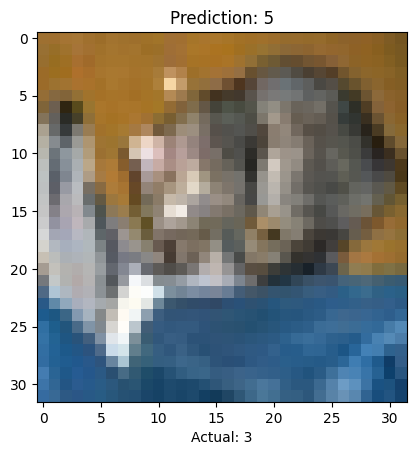

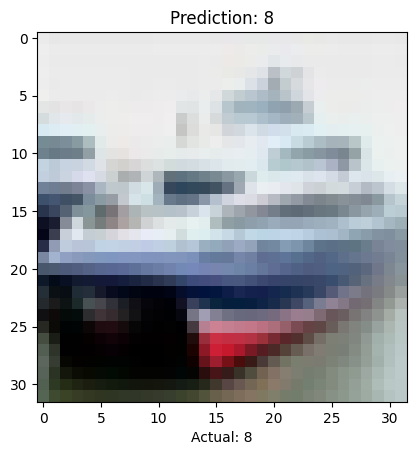

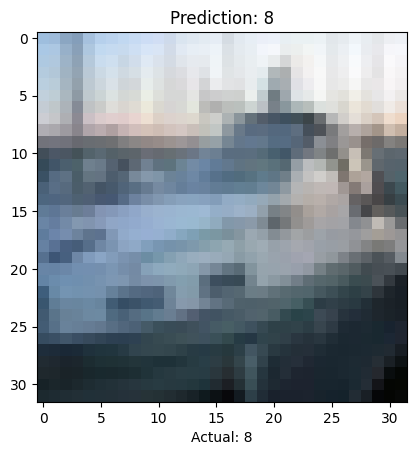

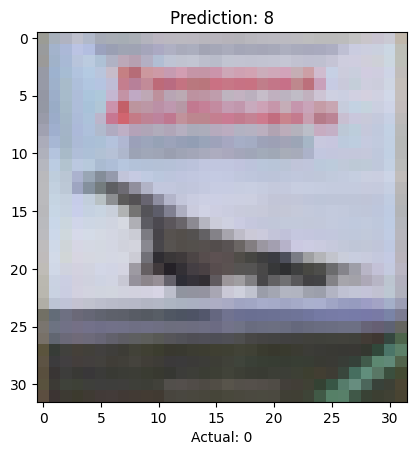

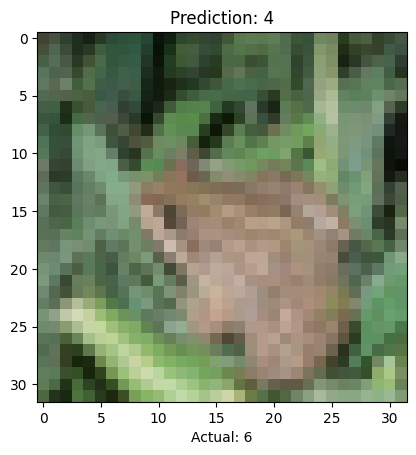

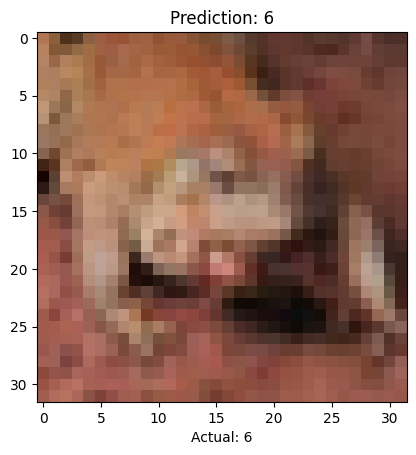

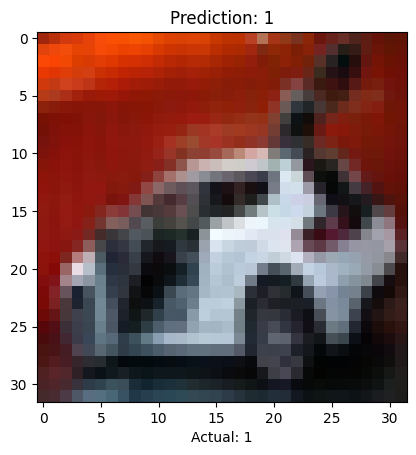

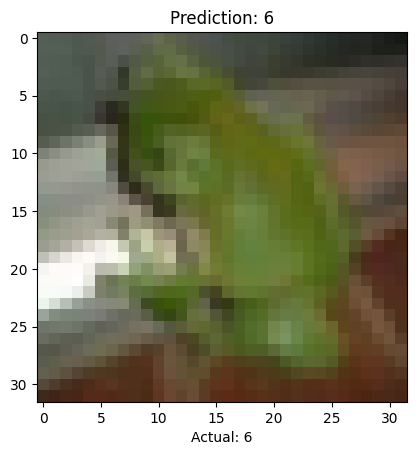

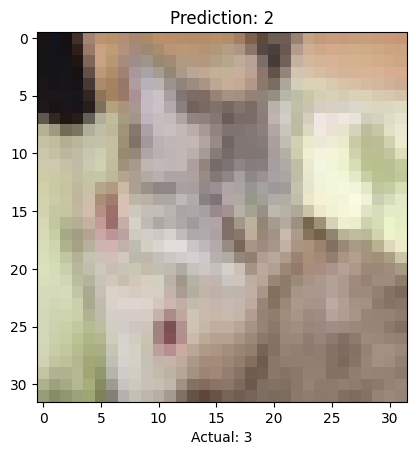

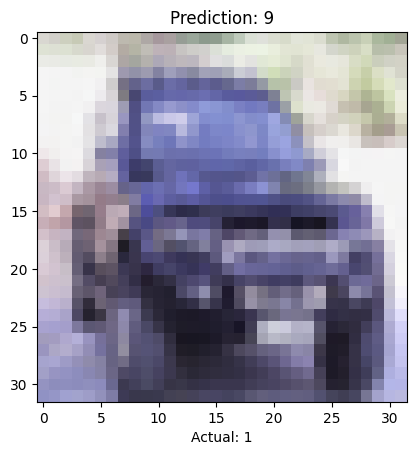

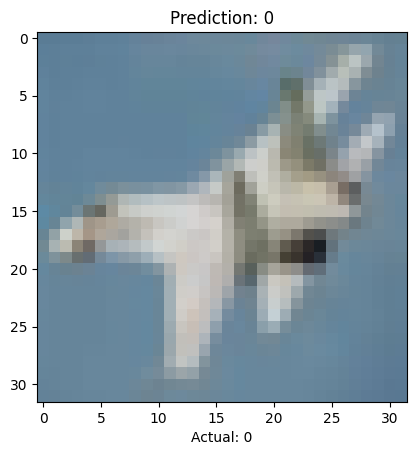

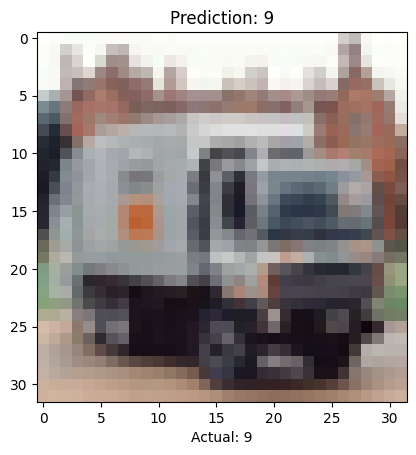

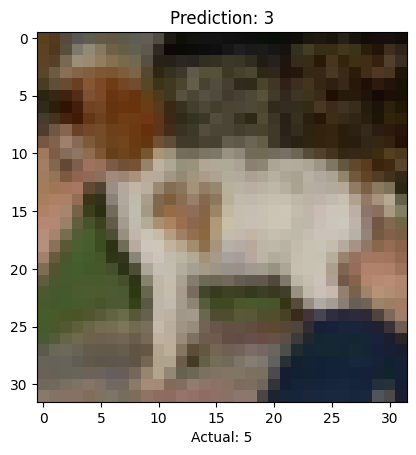

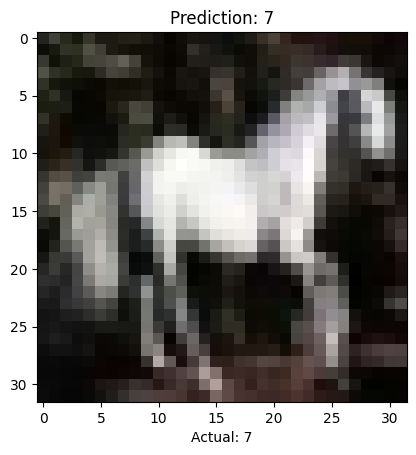

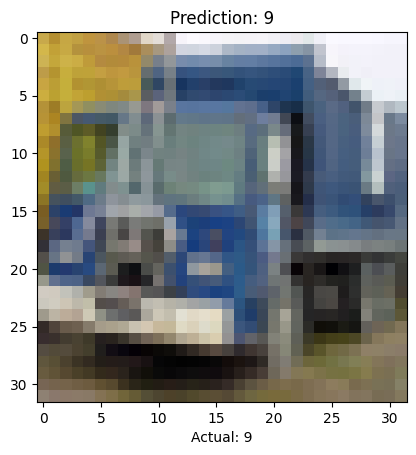

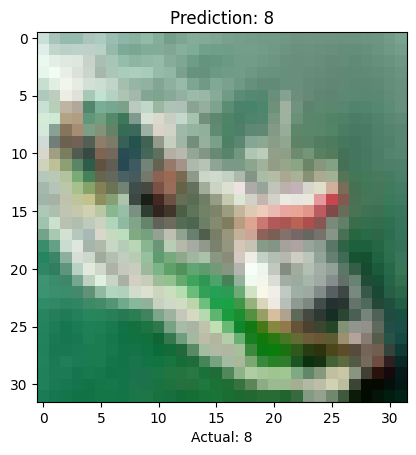

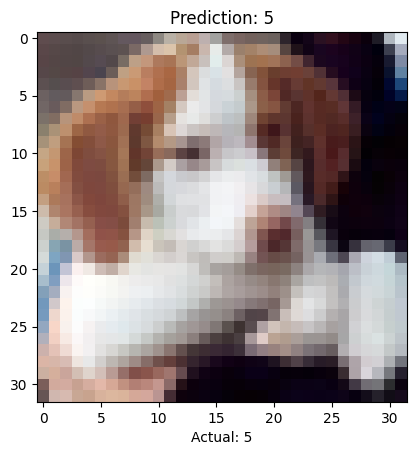

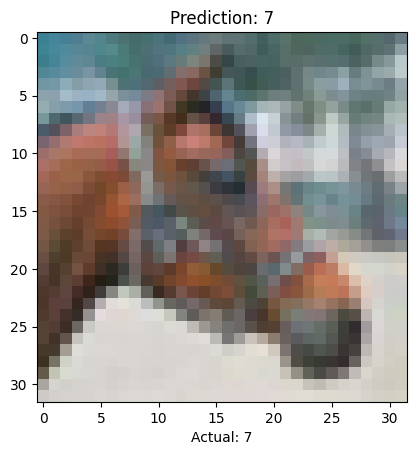

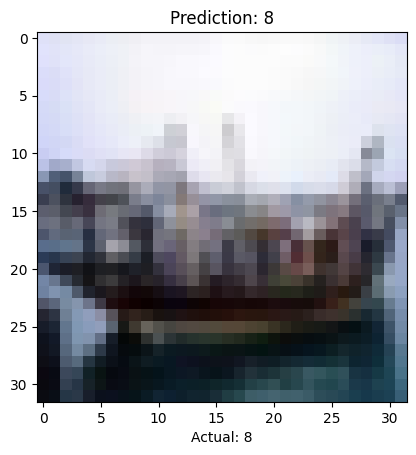

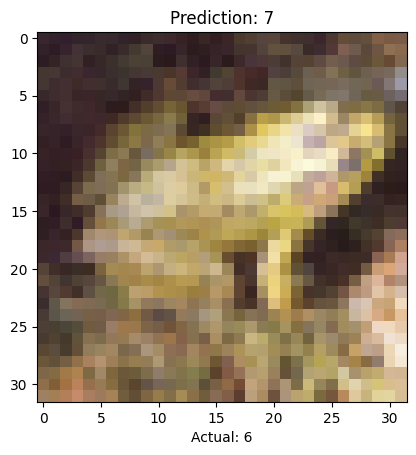

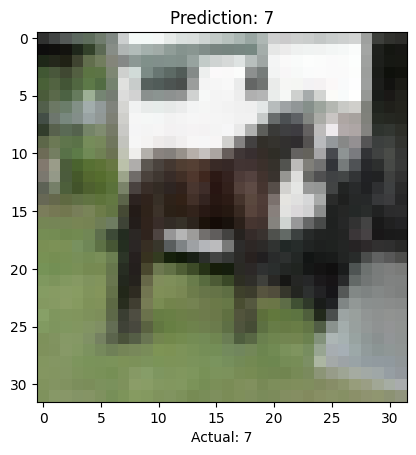

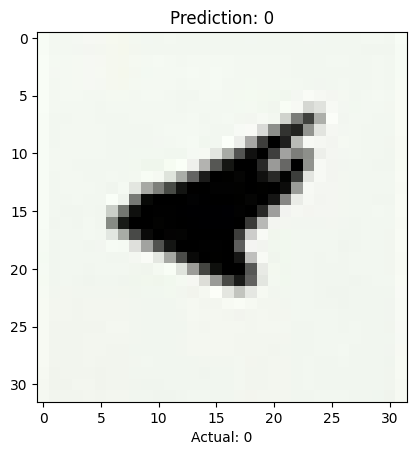

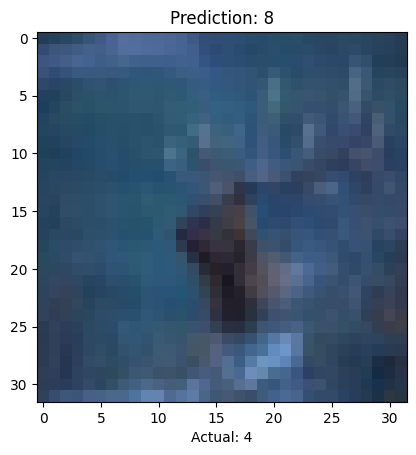

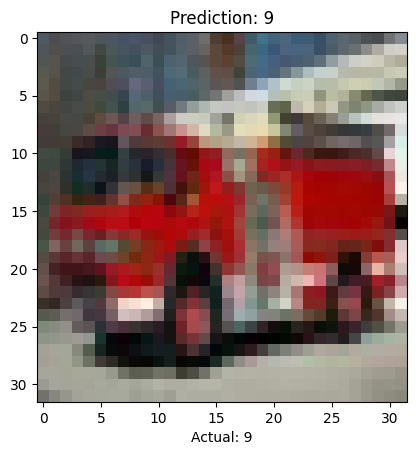

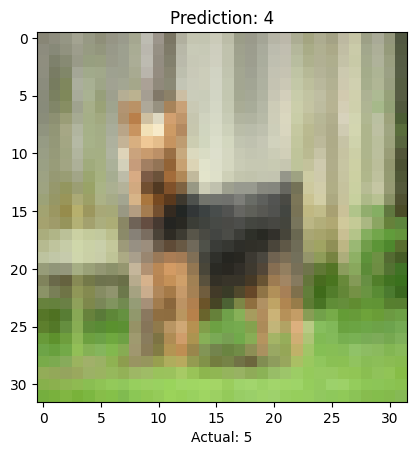

In [ ]:
import matplotlib.pyplot as plt

predictions = model.predict(X_test)

# Visualizamos las primeras 25 imágenes y sus predicciones
for i in range(25):
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel("Actual: " + str(np.argmax(y_test[i])))
    plt.title("Prediction: " + str(np.argmax(predictions[i])))
    plt.show()

